## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model

In [5]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer= optimizer)

W0721 20:35:35.201436 10176 deprecation_wrapper.py:119] From C:\Users\USER\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0721 20:35:35.239654 10176 deprecation_wrapper.py:119] From C:\Users\USER\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0721 20:35:35.254100 10176 deprecation_wrapper.py:119] From C:\Users\USER\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0721 20:35:35.365684 10176 deprecation_wrapper.py:119] From C:\Users\USER\Anaconda3\envs\tensorflow\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0721 20:35:35.38202

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs= 500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0721 20:35:35.602448 10176 deprecation.py:323] From C:\Users\USER\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0721 20:35:35.703571 10176 deprecation_wrapper.py:119] From C:\Users\USER\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 10s 208us/step - loss: 2.2817 - acc: 0.1402 - val_loss: 2.2280 - val_acc: 0.1929
Epoch 2/500
50000/50000 [==============================] - 10s 196us/step - loss: 2.1942 - acc: 0.2211 - val_loss: 2.1636 - val_acc: 0.2449
Epoch 3/500
50000/50000 [==============================] - 10s 196us/step - loss: 2.1380 - acc: 0.2534 - val_loss: 2.1143 - val_acc: 0.2659
Epoch 4/500
50000/50000 [==============================] - 10s 193us/step - loss: 2.0930 - acc: 0.2725 - val_loss: 2.0733 - val_acc: 0.2851
Epoch 5/500
50000/50000 [==============================] - 10s 193us/step - loss: 2.0550 - acc: 0.2842 - val_loss: 2.0395 - val_acc: 0.2996
Epoch 6/500
50000/50000 [==============================] - 10s 192us/step - loss: 2.0236 - acc: 0.2956 - val_loss: 2.0100 - val_acc: 0.3082
Epoch 7/500
50000/50000 [==============================] - 10s 195us/step - loss: 1.9965 - acc: 0.3054 - val_l

50000/50000 [==============================] - 9s 180us/step - loss: 1.6589 - acc: 0.4228 - val_loss: 1.6685 - val_acc: 0.4182
Epoch 59/500
50000/50000 [==============================] - 9s 180us/step - loss: 1.6557 - acc: 0.4234 - val_loss: 1.6659 - val_acc: 0.4207
Epoch 60/500
50000/50000 [==============================] - 9s 184us/step - loss: 1.6526 - acc: 0.4249 - val_loss: 1.6629 - val_acc: 0.4202
Epoch 61/500
50000/50000 [==============================] - 9s 181us/step - loss: 1.6490 - acc: 0.4267 - val_loss: 1.6595 - val_acc: 0.4244
Epoch 62/500
50000/50000 [==============================] - 9s 180us/step - loss: 1.6460 - acc: 0.4271 - val_loss: 1.6575 - val_acc: 0.4236
Epoch 63/500
50000/50000 [==============================] - 9s 181us/step - loss: 1.6430 - acc: 0.4281 - val_loss: 1.6523 - val_acc: 0.4264
Epoch 64/500
50000/50000 [==============================] - 9s 178us/step - loss: 1.6399 - acc: 0.4296 - val_loss: 1.6509 - val_acc: 0.4305
Epoch 65/500
50000/50000 [=======

50000/50000 [==============================] - 9s 173us/step - loss: 1.5181 - acc: 0.4718 - val_loss: 1.5459 - val_acc: 0.4582
Epoch 117/500
50000/50000 [==============================] - 9s 186us/step - loss: 1.5163 - acc: 0.4725 - val_loss: 1.5476 - val_acc: 0.4547
Epoch 118/500
50000/50000 [==============================] - 9s 189us/step - loss: 1.5145 - acc: 0.4732 - val_loss: 1.5552 - val_acc: 0.4561
Epoch 119/500
50000/50000 [==============================] - 9s 185us/step - loss: 1.5131 - acc: 0.4718 - val_loss: 1.5470 - val_acc: 0.4566
Epoch 120/500
50000/50000 [==============================] - 9s 183us/step - loss: 1.5114 - acc: 0.4727 - val_loss: 1.5418 - val_acc: 0.4648
Epoch 121/500
50000/50000 [==============================] - 9s 184us/step - loss: 1.5093 - acc: 0.4736 - val_loss: 1.5445 - val_acc: 0.4570
Epoch 122/500
50000/50000 [==============================] - 9s 186us/step - loss: 1.5074 - acc: 0.4742 - val_loss: 1.5376 - val_acc: 0.4624
Epoch 123/500
50000/50000 [

50000/50000 [==============================] - 9s 187us/step - loss: 1.4251 - acc: 0.5032 - val_loss: 1.4809 - val_acc: 0.4753
Epoch 175/500
50000/50000 [==============================] - 9s 187us/step - loss: 1.4236 - acc: 0.5049 - val_loss: 1.4800 - val_acc: 0.4784
Epoch 176/500
50000/50000 [==============================] - 9s 183us/step - loss: 1.4225 - acc: 0.5050 - val_loss: 1.4806 - val_acc: 0.4764
Epoch 177/500
50000/50000 [==============================] - 9s 185us/step - loss: 1.4210 - acc: 0.5048 - val_loss: 1.4804 - val_acc: 0.4786
Epoch 178/500
50000/50000 [==============================] - 9s 176us/step - loss: 1.4195 - acc: 0.5058 - val_loss: 1.4729 - val_acc: 0.4797
Epoch 179/500
50000/50000 [==============================] - 9s 182us/step - loss: 1.4181 - acc: 0.5064 - val_loss: 1.4815 - val_acc: 0.4805
Epoch 180/500
50000/50000 [==============================] - 9s 180us/step - loss: 1.4167 - acc: 0.5070 - val_loss: 1.4766 - val_acc: 0.4783
Epoch 181/500
50000/50000 [

50000/50000 [==============================] - 9s 187us/step - loss: 1.3446 - acc: 0.5305 - val_loss: 1.4267 - val_acc: 0.4948
Epoch 233/500
50000/50000 [==============================] - 9s 185us/step - loss: 1.3436 - acc: 0.5318 - val_loss: 1.4305 - val_acc: 0.4960
Epoch 234/500
50000/50000 [==============================] - 9s 182us/step - loss: 1.3423 - acc: 0.5314 - val_loss: 1.4263 - val_acc: 0.4947
Epoch 235/500
50000/50000 [==============================] - 9s 180us/step - loss: 1.3406 - acc: 0.5319 - val_loss: 1.4288 - val_acc: 0.4953
Epoch 236/500
50000/50000 [==============================] - 9s 186us/step - loss: 1.3400 - acc: 0.5325 - val_loss: 1.4269 - val_acc: 0.4948
Epoch 237/500
50000/50000 [==============================] - 10s 193us/step - loss: 1.3385 - acc: 0.5329 - val_loss: 1.4232 - val_acc: 0.4971
Epoch 238/500
50000/50000 [==============================] - 10s 195us/step - loss: 1.3375 - acc: 0.5333 - val_loss: 1.4224 - val_acc: 0.4979
Epoch 239/500
50000/50000

50000/50000 [==============================] - 9s 185us/step - loss: 1.2726 - acc: 0.5547 - val_loss: 1.4081 - val_acc: 0.4971
Epoch 291/500
50000/50000 [==============================] - 9s 182us/step - loss: 1.2717 - acc: 0.5551 - val_loss: 1.4192 - val_acc: 0.4953
Epoch 292/500
50000/50000 [==============================] - 9s 181us/step - loss: 1.2702 - acc: 0.5559 - val_loss: 1.3909 - val_acc: 0.5080
Epoch 293/500
50000/50000 [==============================] - 9s 185us/step - loss: 1.2688 - acc: 0.5576 - val_loss: 1.3880 - val_acc: 0.5086
Epoch 294/500
50000/50000 [==============================] - 9s 183us/step - loss: 1.2683 - acc: 0.5565 - val_loss: 1.4059 - val_acc: 0.5018
Epoch 295/500
50000/50000 [==============================] - 9s 188us/step - loss: 1.2660 - acc: 0.5587 - val_loss: 1.4037 - val_acc: 0.4991
Epoch 296/500
50000/50000 [==============================] - 9s 181us/step - loss: 1.2661 - acc: 0.5586 - val_loss: 1.3861 - val_acc: 0.5105
Epoch 297/500
50000/50000 [

50000/50000 [==============================] - 9s 186us/step - loss: 1.2076 - acc: 0.5786 - val_loss: 1.3736 - val_acc: 0.5136
Epoch 348/500
50000/50000 [==============================] - 9s 178us/step - loss: 1.2069 - acc: 0.5778 - val_loss: 1.3770 - val_acc: 0.5125
Epoch 349/500
50000/50000 [==============================] - 9s 182us/step - loss: 1.2058 - acc: 0.5788 - val_loss: 1.3694 - val_acc: 0.5163
Epoch 350/500
50000/50000 [==============================] - 9s 185us/step - loss: 1.2043 - acc: 0.5790 - val_loss: 1.3910 - val_acc: 0.5070
Epoch 351/500
50000/50000 [==============================] - 9s 183us/step - loss: 1.2039 - acc: 0.5784 - val_loss: 1.3741 - val_acc: 0.5110 loss: 1
Epoch 352/500
50000/50000 [==============================] - 9s 183us/step - loss: 1.2025 - acc: 0.5808 - val_loss: 1.3781 - val_acc: 0.5112
Epoch 353/500
50000/50000 [==============================] - 9s 186us/step - loss: 1.2012 - acc: 0.5803 - val_loss: 1.3621 - val_acc: 0.5151
Epoch 354/500
50000

50000/50000 [==============================] - 9s 185us/step - loss: 1.1456 - acc: 0.6005 - val_loss: 1.3618 - val_acc: 0.5171
Epoch 406/500
50000/50000 [==============================] - 9s 186us/step - loss: 1.1436 - acc: 0.6010 - val_loss: 1.3685 - val_acc: 0.5149
Epoch 407/500
50000/50000 [==============================] - 9s 182us/step - loss: 1.1431 - acc: 0.6026 - val_loss: 1.3656 - val_acc: 0.5126
Epoch 408/500
50000/50000 [==============================] - 9s 184us/step - loss: 1.1425 - acc: 0.5997 - val_loss: 1.3440 - val_acc: 0.5225
Epoch 409/500
50000/50000 [==============================] - 9s 187us/step - loss: 1.1420 - acc: 0.6018 - val_loss: 1.3632 - val_acc: 0.5225
Epoch 410/500
50000/50000 [==============================] - 9s 186us/step - loss: 1.1410 - acc: 0.6022 - val_loss: 1.3961 - val_acc: 0.5093
Epoch 411/500
50000/50000 [==============================] - 9s 185us/step - loss: 1.1405 - acc: 0.6016 - val_loss: 1.3468 - val_acc: 0.5245
Epoch 412/500
50000/50000 [

Epoch 463/500
50000/50000 [==============================] - 9s 184us/step - loss: 1.0849 - acc: 0.6217 - val_loss: 1.3669 - val_acc: 0.5237
Epoch 464/500
50000/50000 [==============================] - 10s 194us/step - loss: 1.0845 - acc: 0.6217 - val_loss: 1.3901 - val_acc: 0.5127
Epoch 465/500
50000/50000 [==============================] - 10s 193us/step - loss: 1.0841 - acc: 0.6221 - val_loss: 1.4396 - val_acc: 0.4961
Epoch 466/500
50000/50000 [==============================] - 10s 195us/step - loss: 1.0858 - acc: 0.6219 - val_loss: 1.3614 - val_acc: 0.5199
Epoch 467/500
50000/50000 [==============================] - 9s 182us/step - loss: 1.0812 - acc: 0.6222 - val_loss: 1.3331 - val_acc: 0.5321
Epoch 468/500
50000/50000 [==============================] - 9s 182us/step - loss: 1.0812 - acc: 0.6232 - val_loss: 1.3465 - val_acc: 0.5257
Epoch 469/500
50000/50000 [==============================] - 9s 186us/step - loss: 1.0799 - acc: 0.6234 - val_loss: 1.3446 - val_acc: 0.5198
Epoch 470/

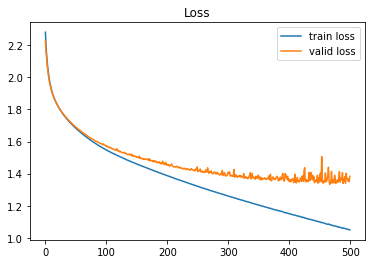

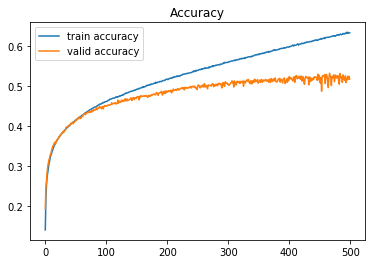

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()